In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

# Angaben im Heft:
# dynamische Viskosität von Wasser bei 10, 20 °C in kg/(m*s) = Paskal*Sekunde:
dv_1 = 1.307 * 10**(-3)
dv_2 = 1.002 * 10**(-3)
dv_5 = 0.548 * 10**(-3)

# Daten aus txt-Datei einlesen
daten = open("KVdaten.txt", mode="r")
inhalt = daten.readlines()
daten.close()
inhalt = [x.strip() for x in inhalt]

# Radien grün, rot, blau
rad = [[float(x)*10**(-3) for x in inhalt[2].split(",")],
       [float(x)*10**(-3) for x in inhalt[4].split(",")],
      [float(x)*10**(-3) for x in inhalt[6].split(",")]]
s_rad = float(inhalt[8])*10**(-3)

# Höhenunterschiede Wasser, Methanol, Ethylenglykol, ( jeweils grün, rot, blau)
hu = [[[float(x)*10**(-3) for x in inhalt[12].split(",")],
      [float(x)*10**(-3) for x in inhalt[14].split(",")],
      [float(x)*10**(-3) for x in inhalt[16].split(",")],],
      
     [[float(x)*10**(-3) for x in inhalt[19].split(",")],
     [float(x)*10**(-3) for x in inhalt[21].split(",")],
     [float(x)*10**(-3) for x in inhalt[23].split(",")],],
      
      [[float(x)*10**(-3) for x in inhalt[26].split(",")],
      [float(x)*10**(-3) for x in inhalt[28].split(",")],
      [float(x)*10**(-3) for x in inhalt[30].split(",")],]]

s_hu = float(inhalt[32])*10**(-3)

#Dichte der Flüssigkeiten Wasser, Methanol, Ethylenglykol
d = [float(inhalt[35]), float(inhalt[37]), float(inhalt[39])]

s_d = float(inhalt[41])

# Volumen des Glasgefäßes
v = float(inhalt[44])

s_v = float(inhalt[46])

# Länge der Kapillaren grün, rot, blau
l = [float(inhalt[49]),float(inhalt[51]), float(inhalt[53])] 

s_l = float(inhalt[55])

# Temperatur des Wassers
temp = float(inhalt[57])

s_temp = float(inhalt[59])

# Ausflusszeit des Wassers grün, rot, blau
ta1 = [float(inhalt[62]), float(inhalt[64]), float(inhalt[66])]

s_ta1 = float(inhalt[68])

# Höhe der Wassersäule
hw = [float(x) for x in inhalt[70].split(",")]
s_hw = float(inhalt[72])

# Ausflusszeit 
ta2 = [float(x) for x in inhalt[74].split(",")]
ta2[0] = 0.0001

s_ta2 = float(inhalt[76])

In [2]:
# Auswertung Teil 1: Oberflächenspannung

def sigma(hohe, dichte, radius):
    sigma = 1/2* hohe*dichte*radius*9.81
    return sigma

def s_sigma(hohe, dichte, radius, s_h, s_d, s_r):
    s_sigma = 1/2*np.sqrt((dichte*radius*9.81*s_h)**2+(hohe*radius*9.81*s_d)**2+(hohe*dichte*9.81*s_r))
    return s_sigma

# Mittelwerte:
def mittel(n, liste):
    x = 0
    for i in range(n):
        x += liste[i]
    x = x/n
    return x

# Gewichtete Mittelwerte:
def g_mittel(n, liste, fehler):
    x = 0
    f = 0
    for i in range(n):
        x += liste[i]/fehler[i]**2
        f += 1/fehler[i]**2
    x = x/f
    return x
def s_g_mittel(n, fehler):
    f = 0
    for i in range(n):
        f += 1/fehler[i]**2
    f = np.sqrt(1/f)
    return f

# Mittelwerte der Radien:
rad_mittel =  [mittel(2, rad[0]), mittel(2, rad[1]), mittel(2, rad[2])]
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|}\hline\n & Radien in mm \\\\\hline \n Grün & $%.2f \pm %.1f$ \\\\\hline\n Rot & $%.2f \pm %.1f$\\\\\hline\n Blau &$ %.2f \pm %.1f $\\\\\hline \end{tabular}\n\caption{Radien der Kapillare}\n \label{tab:my_label}\n\end{table}" % (rad_mittel[0]*1000, s_rad*1000, rad_mittel[1]*1000, s_rad*1000, rad_mittel[2]*1000, s_rad*1000))

# Dichten der Stoffe
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|c|}\hline\n & experimentell in $\\frac{kg}{m^3}$ & Literaturwert in  $\\frac{kg}{m^3}$ \\\\\hline \n Wasser & $%d \pm %d$ & \\\\\hline\n Methanol &$ %d \pm %d $& \\\\\hline\n Ethylenglykol &$ %d \pm %d $& \\\\\hline \end{tabular}\n \caption{Dichten der Stoffe mit Literaturwerten aus \\ref{demt}} \n \label{tab:my_label}\n\end{table}" % (d[0], s_d, d[1], s_d, d[2], s_d))

# Mittelwerte der Höhendifferenzen beim Eintauchen
hu_mittel = [[mittel(3, hu[0][0]),mittel(3, hu[0][1]),mittel(3, hu[0][2])],[mittel(3, hu[1][0]),mittel(3, hu[1][1]),mittel(3, hu[1][2])],[mittel(3, hu[2][0]),mittel(3, hu[2][1]),mittel(3, hu[2][2])]]
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|c|c|}\hline\n & Grün & Rot & Blau \\\\\hline \n Wasser & $%.1f \pm %.1f$  & $%.1f \pm %.1f$ & $%.1f \pm %.1f$\\\\\hline\n Methanol & $%.1f \pm %.1f$& $%.1f \pm %.1f$& $%.1f \pm %.1f$ \\\\\hline\n Ethylenglykol & $%.1f \pm %.1f$& $%.1f \pm %.1f$& $%.1f \pm %.1f$ \\\\\hline \end{tabular}\n \caption{Mittel der Höhenunterschiede} \n \label{tab:my_label}\n\end{table}" % (hu_mittel[0][0]*100, s_hu*100, hu_mittel[0][1]*100, s_hu*100, hu_mittel[0][2]*100, s_hu*100, hu_mittel[1][0]*100, s_hu*100, hu_mittel[1][1]*100, s_hu*100, hu_mittel[1][2]*100, s_hu*100, hu_mittel[2][0]*100, s_hu*100, hu_mittel[2][1]*100, s_hu*100, hu_mittel[2][2]*100, s_hu*100))

#Oberflächenspannung
ofs = [[sigma(hu_mittel[0][0], d[0], rad_mittel[0]),sigma(hu_mittel[0][1], d[0], rad_mittel[1]),sigma(hu_mittel[0][2], d[0], rad_mittel[2])],[sigma(hu_mittel[1][0], d[1], rad_mittel[0]),sigma(hu_mittel[1][1], d[1], rad_mittel[1]),sigma(hu_mittel[1][2], d[1], rad_mittel[2])],[sigma(hu_mittel[2][0], d[2], rad_mittel[0]),sigma(hu_mittel[2][1], d[2], rad_mittel[1]),sigma(hu_mittel[2][2], d[2], rad_mittel[2])]]
s_ofs = [[s_sigma(hu_mittel[0][0], d[0], rad_mittel[0], s_hu, s_d, s_rad),s_sigma(hu_mittel[0][1], d[0], rad_mittel[1], s_hu, s_d, s_rad),s_sigma(hu_mittel[0][2], d[0], rad_mittel[2], s_hu, s_d, s_rad)],[s_sigma(hu_mittel[1][0], d[1], rad_mittel[0], s_hu, s_d, s_rad),s_sigma(hu_mittel[1][1], d[1], rad_mittel[1], s_hu, s_d, s_rad),s_sigma(hu_mittel[1][2], d[1], rad_mittel[2], s_hu, s_d, s_rad)],[s_sigma(hu_mittel[2][0], d[2], rad_mittel[0], s_hu, s_d, s_rad),s_sigma(hu_mittel[2][1], d[2], rad_mittel[1], s_hu, s_d, s_rad),s_sigma(hu_mittel[2][2], d[2], rad_mittel[2], s_hu, s_d, s_rad)]]
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|c|c|}\hline\n & Grün & Rot & Blau \\\\\hline \n Wasser & $%.3f \pm %.3f$  & $%.3f \pm %.3f$ & $%.3f \pm %.3f$\\\\\hline\n Methanol & $%.3f \pm %.3f$& $%.3f \pm %.3f$& $%.3f \pm %.3f$ \\\\\hline\n Ethylenglykol & $%.3f \pm %.3f$& $%.3f \pm %.3f$& $%.3f \pm %.3f$ \\\\\hline \end{tabular}\n \caption{Oberflächenspannungen} \n \label{tab:my_label}\n\end{table}" % (ofs[0][0], s_ofs[0][0], ofs[0][1], s_ofs[0][1], ofs[0][2], s_ofs[0][2], ofs[1][0], s_ofs[1][0], ofs[1][1], s_ofs[1][1], ofs[1][2], s_ofs[1][2], ofs[2][0], s_ofs[2][0], ofs[2][1], s_ofs[2][1], ofs[2][2], s_ofs[2][2]))

# Gewichtete Mittelwerte
m_ofs = [g_mittel(3, ofs[0], s_ofs[0]), g_mittel(3, ofs[1], s_ofs[1]), g_mittel(3, ofs[2], s_ofs[2])]
sm_ofs = [s_g_mittel(3, s_ofs[0]), s_g_mittel(3, s_ofs[1]), s_g_mittel(3, s_ofs[2])]
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|c|}\hline\n & gewichteter Mittelwert in $\\frac{kg}{s^2}$& Literaturwert in $\\frac{kg}{s^2}$ \\\\\hline \n Wasser & $%.3f \pm %.3f$ & \\\\\hline\n Methanol & $%.3f \pm %.3f$ & \\\\\hline\n Ethylenglykol & $%.3f \pm %.3f$ & \\\\\hline \end{tabular}\n \caption{Oberflächenspannungen: gewichtete Mittelwerte} \n \label{tab:my_label}\n\end{table}" % (m_ofs[0], sm_ofs[0], m_ofs[1], sm_ofs[1], m_ofs[2], sm_ofs[2]))

\begin{table}[H]
\centering
\begin{tabular}{|c|c|}\hline
 & Radien in mm \\\hline 
 Grün & $0.75 \pm 0.1$ \\\hline
 Rot & $0.45 \pm 0.1$\\\hline
 Blau &$ 0.55 \pm 0.1 $\\\hline \end{tabular}
\caption{Radien der Kapillare}
 \label{tab:my_label}
\end{table}
\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|}\hline
 & experimentell in $\frac{kg}{m^3}$ & Literaturwert in  $\frac{kg}{m^3}$ \\\hline 
 Wasser & $1000 \pm 200$ & \\\hline
 Methanol &$ 850 \pm 200 $& \\\hline
 Ethylenglykol &$ 1670 \pm 200 $& \\\hline \end{tabular}
 \caption{Dichten der Stoffe mit Literaturwerten aus \ref{demt}} 
 \label{tab:my_label}
\end{table}
\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|}\hline
 & Grün & Rot & Blau \\\hline 
 Wasser & $0.8 \pm 0.3$  & $1.3 \pm 0.3$ & $0.9 \pm 0.3$\\\hline
 Methanol & $0.7 \pm 0.3$& $1.1 \pm 0.3$& $0.6 \pm 0.3$ \\\hline
 Ethylenglykol & $0.7 \pm 0.3$& $0.9 \pm 0.3$& $0.4 \pm 0.3$ \\\hline \end{tabular}
 \caption{Mittel der Höhenunterschiede} 
 \label{tab:my_label}
\e

\begin{table}[H]
\centering
\begin{tabular}{|c|c|}\hline
 & Ausflusszeiten in s \\\hline 
 Grün & $6.00 \pm 2.0$ \\\hline
 Rot & $71.00 \pm 2.0$\\\hline
 Blau &$ 19.00 \pm 2.0 $\\\hline \end{tabular}
\caption{Ausflusszeiten in Sekunden}
 \label{tab:my_label}
\end{table}
\begin{table}[H]
\centering
\begin{tabular}{|c|c|}\hline
 & Viskosität in Pas  \\\hline 
 Grün & $0.00068 \pm 0.00051$ \\\hline
 Rot & $0.00104 \pm 0.00102$ \\\hline
 blau & $0.00064 \pm 0.00054$ \\\hline \end{tabular}
 \caption{Viskosität von Wasser} 
 \label{tab:my_label}
\end{table}
Gewichteter Mittelwert Viskosität:  0.000705081684533 +/- 0.000347582657118
m =  -0.00150987270827 b =  -0.696902250171 Fehler:  1.55576378461e-05


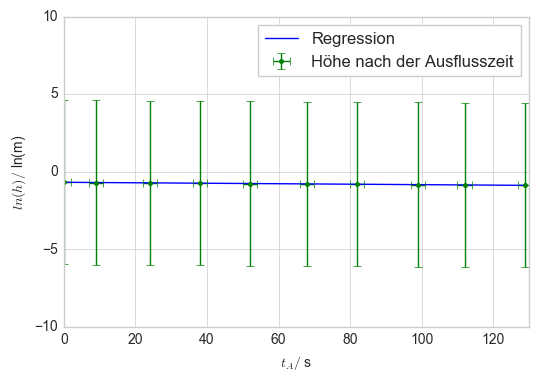

In [3]:
#Auswertung Teil 2: Viskosität
from scipy import stats

def eta(p, l, dv, r, t):
    eta = np.pi * p * r**4 * t /(8 * dv * l)
    return eta
def s_eta(p, l, dv, r, t, s_p, s_l, s_dv, s_r, s_t):
    f = np.sqrt((np.pi*p*r**3*t/(2*dv*l)*s_r)**2
                +(np.pi*p*r**4/(8*dv*l)*s_t)**2
                +(np.pi*r**4*t/(8*dv*l)*s_p)**2)
    return f

#Ausflusszeiten 1
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|}\hline\n & Ausflusszeiten in s \\\\\hline \n Grün & $%.2f \pm %.1f$ \\\\\hline\n Rot & $%.2f \pm %.1f$\\\\\hline\n Blau &$ %.2f \pm %.1f $\\\\\hline \end{tabular}\n\caption{Ausflusszeiten in Sekunden}\n \label{tab:my_label}\n\end{table}" % (ta1[0], s_ta1, ta1[1], s_ta1, ta1[2], s_ta1))

vis = [eta(490.5, l[0], v, rad_mittel[0], ta1[0]), eta(490.5, l[1], v, rad_mittel[1], ta1[1]), eta(490.5, l[2], v, rad_mittel[2], ta1[2])]
s_vis =  [s_eta(490.5, l[0], v, rad_mittel[0], ta1[0], s_d, s_l, s_v, s_rad, s_ta1), s_eta(490.5, l[1], v, rad_mittel[1], ta1[1], s_d, s_l, s_v, s_rad, s_ta1), s_eta(490.5, l[2], v, rad_mittel[2], ta1[2], s_d, s_l, s_v, s_rad, s_ta1)]
print("\\begin{table}[H]\n\centering\n\\begin{tabular}{|c|c|}\hline\n & Viskosität in Pas  \\\\\hline \n Grün & $%.5f \pm %.5f$ \\\\\hline\n Rot & $%.5f \pm %.5f$ \\\\\hline\n blau & $%.5f \pm %.5f$ \\\\\hline \end{tabular}\n \caption{Viskosität von Wasser} \n \label{tab:my_label}\n\end{table}" % (vis[0], s_vis[0], vis[1], s_vis[1], vis[2], s_vis[2]))

# Gewichteter Mittelwert
vis_mittel = g_mittel(3, vis, s_vis)
s_vis_mittel = s_g_mittel(3, s_vis)
print("Gewichteter Mittelwert Viskosität: ", vis_mittel, "+/-", s_vis_mittel)

# Ausflusszeit in Abhängigkeit der Höhe
hw = [np.log(x) for x in hw]
s_hw = np.log(s_hw)

slope, intercept, r_value, p_value, std_err = stats.linregress(ta2,hw)
print("m = ",slope,"b = ", intercept,"Fehler: ", std_err)
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,130,130)
plt.plot(slope*x+intercept, label="Regression")
plt.errorbar(ta2, hw, xerr = s_ta2, yerr = s_hw, fmt='.',label="Höhe nach der Ausflusszeit")
plt.xlabel(r"$t_A /$ s")
plt.ylabel(r"$ln(h) /$ ln(m)")
plt.axis([0, 130,-10,10]) # ([x_Achsenstart, x-Achsenstopp, y-Achsenstart, y-Achsenstopp])
ax.legend(loc="upper right",frameon=True)
plt.savefig("H_ta.png")
plt.show()

In [4]:
# Viskosität
visk = -1*d[0]*9.81*rad_mittel[1]**4/(8*slope*l[1]*(1.15*10**(-2))**2)
s_visk = np.sqrt((1*d[0]*9.81*rad_mittel[1]**4/(8*slope**2*l[1]*(1.15*10**(-2))**2)*std_err)**2 + (-1*d[0]*9.81*rad_mittel[1]**3/(2*slope*l[1]*(1.15*10**(-2))**2)*s_rad)**2)
print("Viskosität des Wassers: ",visk,"+/-", s_visk)

Viskosität des Wassers:  0.000968544795378 +/- 0.000860986547803
